In [145]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error ### over ver 0.24
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [137]:
### open co2.csv file and get header from 55th row of the file and get data from 58th row of the file
df = pd.read_csv('co2.csv', header=1, skiprows=53)
# df = pd.read_csv('co2.csv', skiprows=56)
# df.head()

### delete first and second row of the dataframes
df = df.iloc[2:]

# ### reset index of the dataframe to get rid of old index
# df = df.reset_index(drop=True)
# df.head()

### Making a new dataframe with 5th column of the dataframe
df_new = df.iloc[:, 4]
df_new.head()


2       -99.99
3       -99.99
4       315.70
5       317.45
6       317.51
Name:      CO2, dtype: object

In [138]:

### Transforming the dataframe to float64
df_new = df_new.astype(float)
df_new.head()

### If the row in df_new contains -99.99, then drop the row with -99.99
df_new_drop = df_new.drop(df_new[df_new == -99.99].index)
df_new_drop.head()

4    315.70
5    317.45
6    317.51
8    315.86
9    314.93
Name:      CO2, dtype: float64

In [139]:
### Making df_new_drop as numpy array with index
arr_values = df_new_drop.values

### Making a new array from index of df_new_drop
arr_index = df_new_drop.index
arr_index = arr_index.to_numpy()
arr_index = (arr_index+0.5)/12
# print(arr_index)

print(arr_values.shape)
print(arr_index.shape)
print(type(arr_values))
print(type(arr_index))

# arr_CO2 = np.vstack((arr_index, arr_values))
# arr_CO2 = arr_CO2.T
# print(arr_CO2)

(734,)
(734,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [140]:
x_train, x_test, y_train, y_test = train_test_split(arr_index, arr_values, test_size=0.2)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(587, 1) (147, 1) (587, 1) (147, 1)


In [141]:
### Making Simple Linear Regression Model with x_train and y_train
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
print('Intercept: ', reg.intercept_)
print('Coef: ', reg.coef_)

Intercept:  [305.52080831]
Coef:  [[1.57277404]]


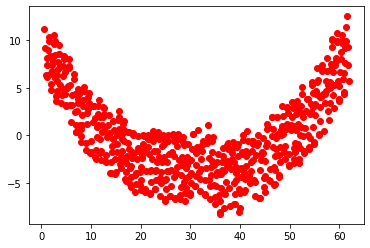

In [148]:
prediction = reg.predict(x_train)
residual = (y_train - prediction)
# print(residual)

plt.plot(x_train, residual, 'o', color='red');

In [149]:
print('MSE: ', mean_squared_error(y_train, prediction, squared = False))
print('MAE: ', mean_absolute_error(y_train, prediction))

MSE:  4.359687372529439
MAE:  3.527161745076124


In [146]:
degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [150]:
lin_reg = LinearRegression()
lin_reg.fit(polyreg, y_train)
y_pred = lin_reg.predict(polyreg)

ValueError: Expected 2D array, got 1D array instead:
array=[PolynomialFeatures(degree=9, include_bias=True, interaction_only=False,
                   order='C')
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.